# Inflation: An Anaysis using the Equation of exchange

Much has been recently of high inflation resulting from the Federal Reserve and United State's Congressional fical policy. Citing the hardship brought on by the 2020 coronavirus pandemic, congress flooded the economy with stimulus and the Federal Reserve brought lending rates to record-lows[5]. In light of our studies in this semester of Intermediate Macroeconomics, I am going to attempt to tie together the causal pathways around inflation we were taught to real-life data.

## The monetary base
### Interest Rates
These graphs and data show the stark changes to fiscal policy brought on by the pandemic. The Federal Funds Rate, which is the overnight bank-lending rate, determines how much reserves a bank is required to keep at the bank, not allowed to be lent out. When this number falls, more money is able to be lent and this increases the supply of loanable funds, decreasing the premium paid for loans, which is the interest rate. This in turn raises the monetary base.
I have included mortgage rates and bank prime loan rates to show the effect the Fed Funds rate had on these interest rates, and the rate iof change in the monetary base, so we can intuit the correlation that exists between these indicators.

In [1]:
import datetime
from datlib.FRED import *
from datlib.plots import *
#Import monetary base
# {data_name1:data_code1,
#  data_name2:data_code2}
data_codes = {
    'Government Spending': 'FGEXPND',
    'Overnight Lending Rate': 'FEDFUNDS',
    '30 Year Fixed-Rate Mortgage': 'MORTGAGE30US',
    'Bank Prime Loan Rate': 'DPRIME',
    "Base Money":"WCURCIR",
    "Price Level":"GDPDEF",
    "Nominal GDP":"GDP"
}

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes=data_codes, start=start, end=end, freq="M")

In [30]:
data["Base Money Yearly Rate of Change"] = data["Base Money"].pct_change(12)

Text(0.5, 1.0, 'Interest Rates and the Growth of the Monetary Base')

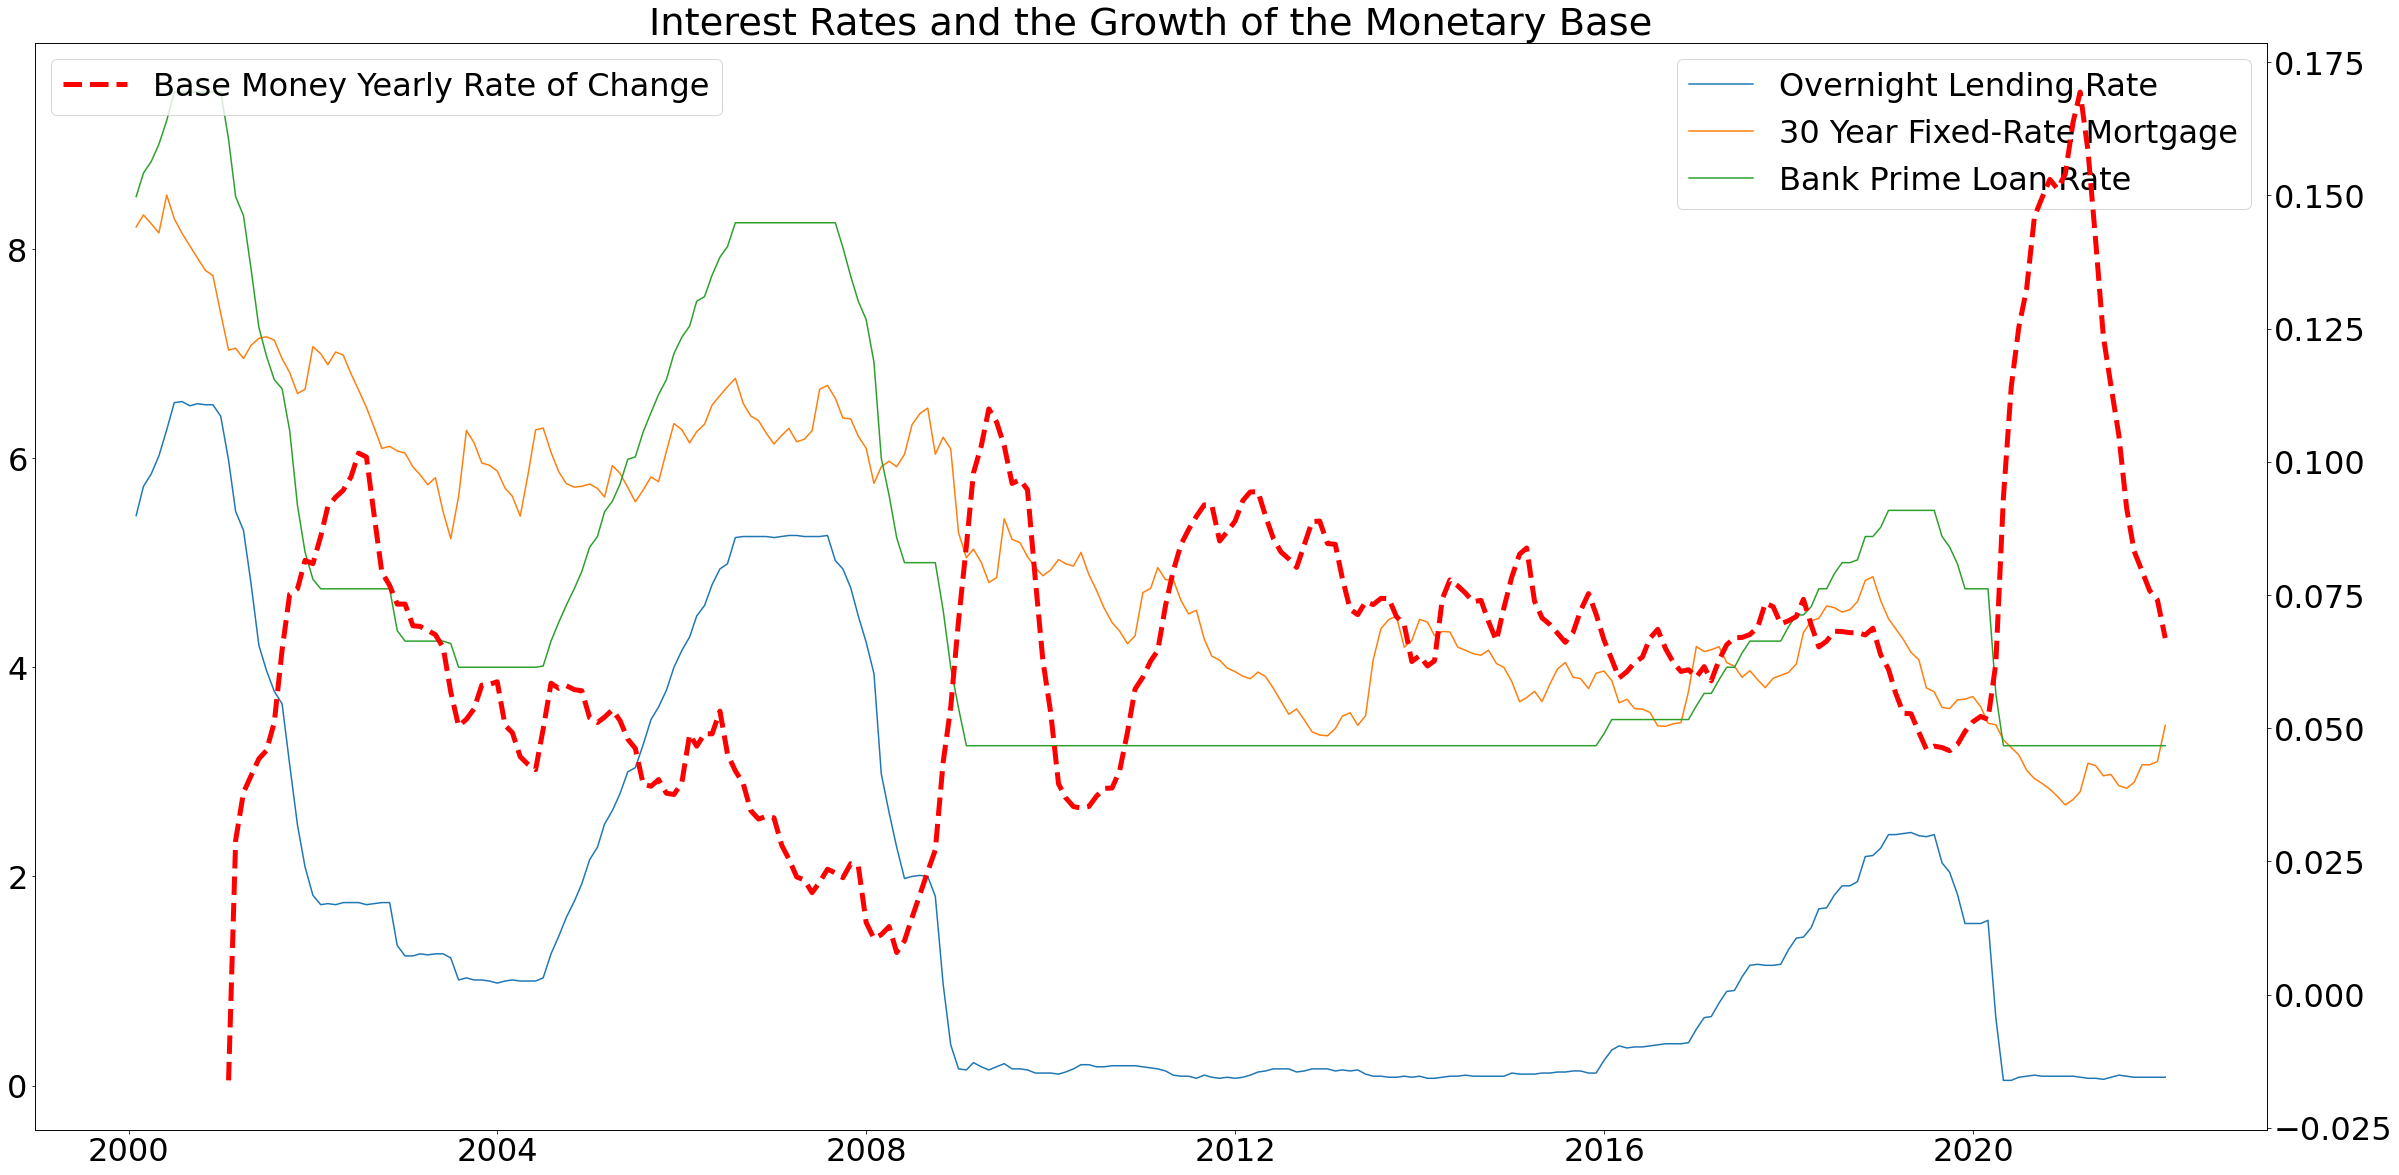

In [48]:
plt.rcParams.update({"font.size":32})
fig, ax = plt.subplots(figsize = (40, 20))
interest_rates = ["Overnight Lending Rate", "30 Year Fixed-Rate Mortgage", "Bank Prime Loan Rate"]
plt.plot(data[interest_rates], label = interest_rates)
plt.legend()
ax1 = ax.twinx()
ax1.plot(data["Base Money Yearly Rate of Change"], lw=5, linestyle="--", c='r', label = "Base Money Yearly Rate of Change")
plt.legend()
plt.title("Interest Rates and the Growth of the Monetary Base")

As we can see, after the 2008 financial crisis, the Federal Reserve cut rates to zero in an attempt to stimulate the receeding economy. Then again, they did this during the COVID-19 Pandemic. Each time interest rates are slashed, there is a spike in the growth of the monetary base, suggesting a significant inverse correlation between interst rates and the monetary base.  

### Government Spending
At the same time as the Federal Reserve was making it easier than ever to take out a loan, injecting loads of liquidity into financial markets, Congress was passing massive spending packages, also in attempts to jog the economy during the recession. The Obama administration’s stimulus package to respond to the 2008 recession was 787 billion; the COVID-19 pandemic stimulus packages, between the Trump and the Biden administrations, reach around 5 trillion.[[1]](https://www.nbcnews.com/business/business-news/whats-causing-inflation-economists-point-fingers-different-culprits-rcna16156)

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


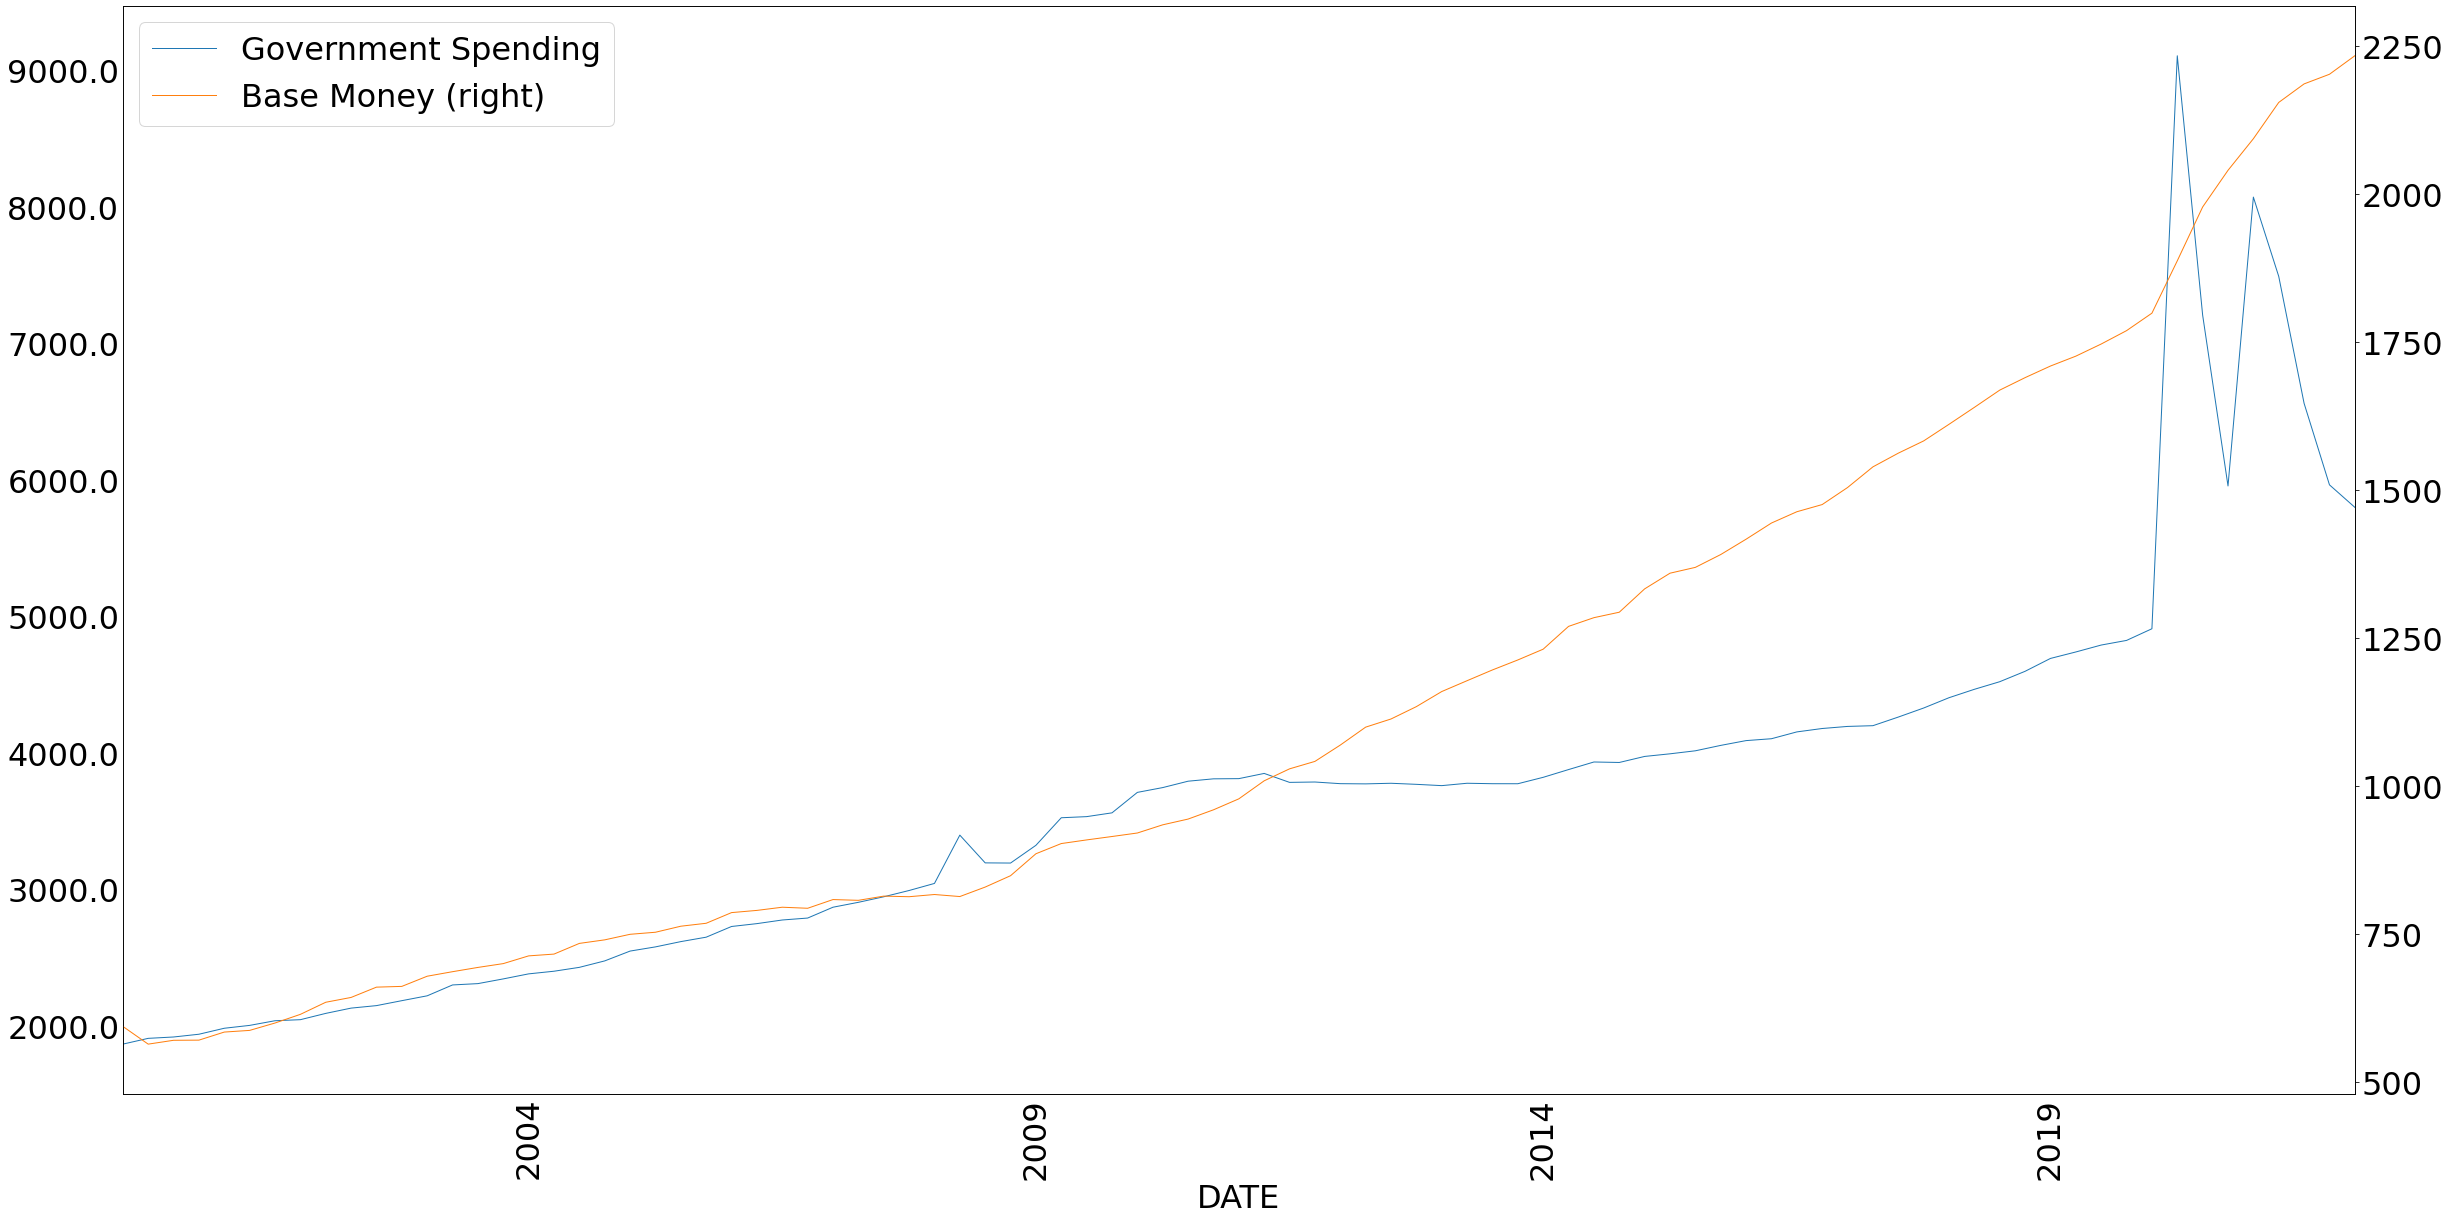

In [65]:
vars2 = ["Government Spending", "Base Money"]
plot_lines(data[vars2], secondary_y = "Base Money")

We can also analyze the rates of change between these variables: 

In [66]:
data["Government Spending Changes"] = data["Government Spending"].dropna().pct_change()

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


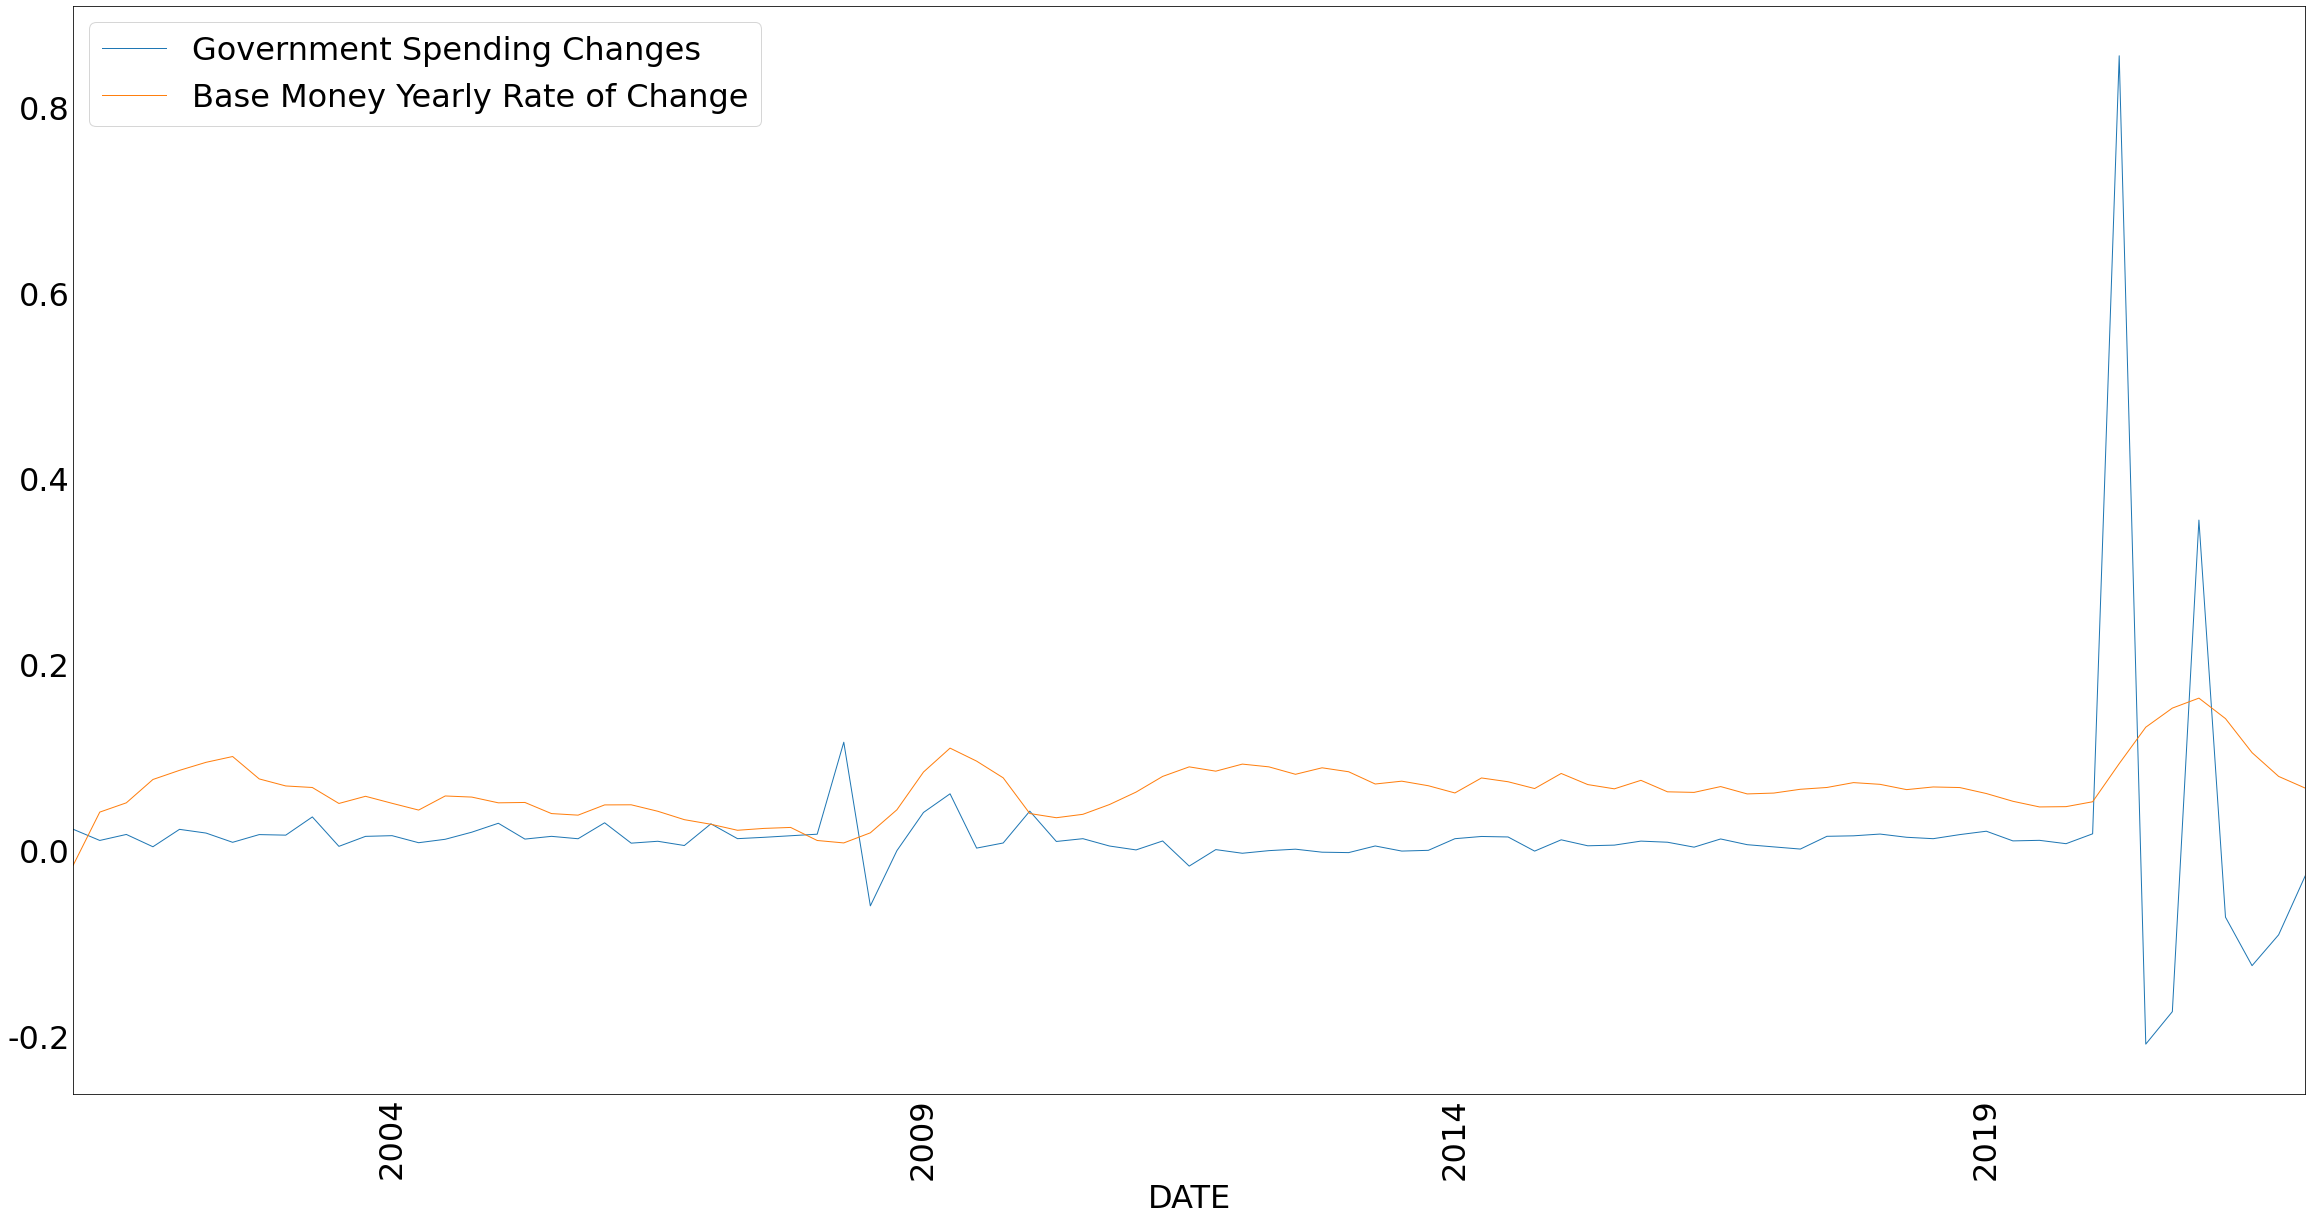

In [68]:
vars3 = ["Government Spending Changes", "Base Money Yearly Rate of Change"]
plot_lines(data[vars3])

This correlation is harder to see because the changes in the two tend to be less abrupt than changes in interest rates. But, in 2020, the initial spike in government spending was followed by a spike in base money, although as we have seen this correlation could be explained by the change in interest rates. 

The goal of these policies was to keep unemployment levels from getting out of control and to keep businesses and people afloat. It was temporary relief that, in theory, would keep people from completely collapsing under harsh economic conditions. Whether or not these policies were as effective as desired remains an open question as we have no counter-example to compare our results to. What is true, however, was that predictible rises in cost of living came as a result of these liquidity-injecting monetary policies. 

### The Monetary Base and Inflation

I have layed out some theories as to how the monetary base may have risen in the recent past, namely through slashing of interest rates and increases in government spending. 


The monetary equation of exchange lays out the relationship between the size of the monetary base and inflation [2]. $MV = Py$ is the equation that explains an increase in the monetary base, $M$, velocity $V$ being constant, will result in an increase in nominal incomes, $Py$. However, this increase in nominal income does not come from an increase in real income, $y$, but rather an increase in the price level, $P$. This takes away purchasing power from the consumer and leads to lower living standards. 

The Federal Reserve Act directs the Fed to promote maximum employment and stable prices[3]. Since 2012, the Federal Reserve has targeted annual inflation of 2% as consistent with the stable prices portion of its dual mandate.

The Fed targets a positive rate of inflation, defined as a sustained rise in the overall price level for goods and services, because a sustained decline in prices, known as deflation, can be even more harmful to the economy. The positive level of inflation and interest rates also provides the central bank with the flexibility to lower rates in response to an economic slowdown.

I have shown that the monetary base has skyrocketed as a result of domestic fiscal policy. I plotted the Federal Funds Rate, Government spending, and Base money to show the relationship between these metrics.

The equation of exchange, $MV = Py$, can be rearranged to show that the growth rate of the price level(inflation) is proportional to the growth rate of the money supply. 

The inflation metric is created and this relationship is analyzed in the below graph. 

In [70]:
data["Inflation(Year-Over-Year)"] = data["Price Level"].pct_change(12)

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


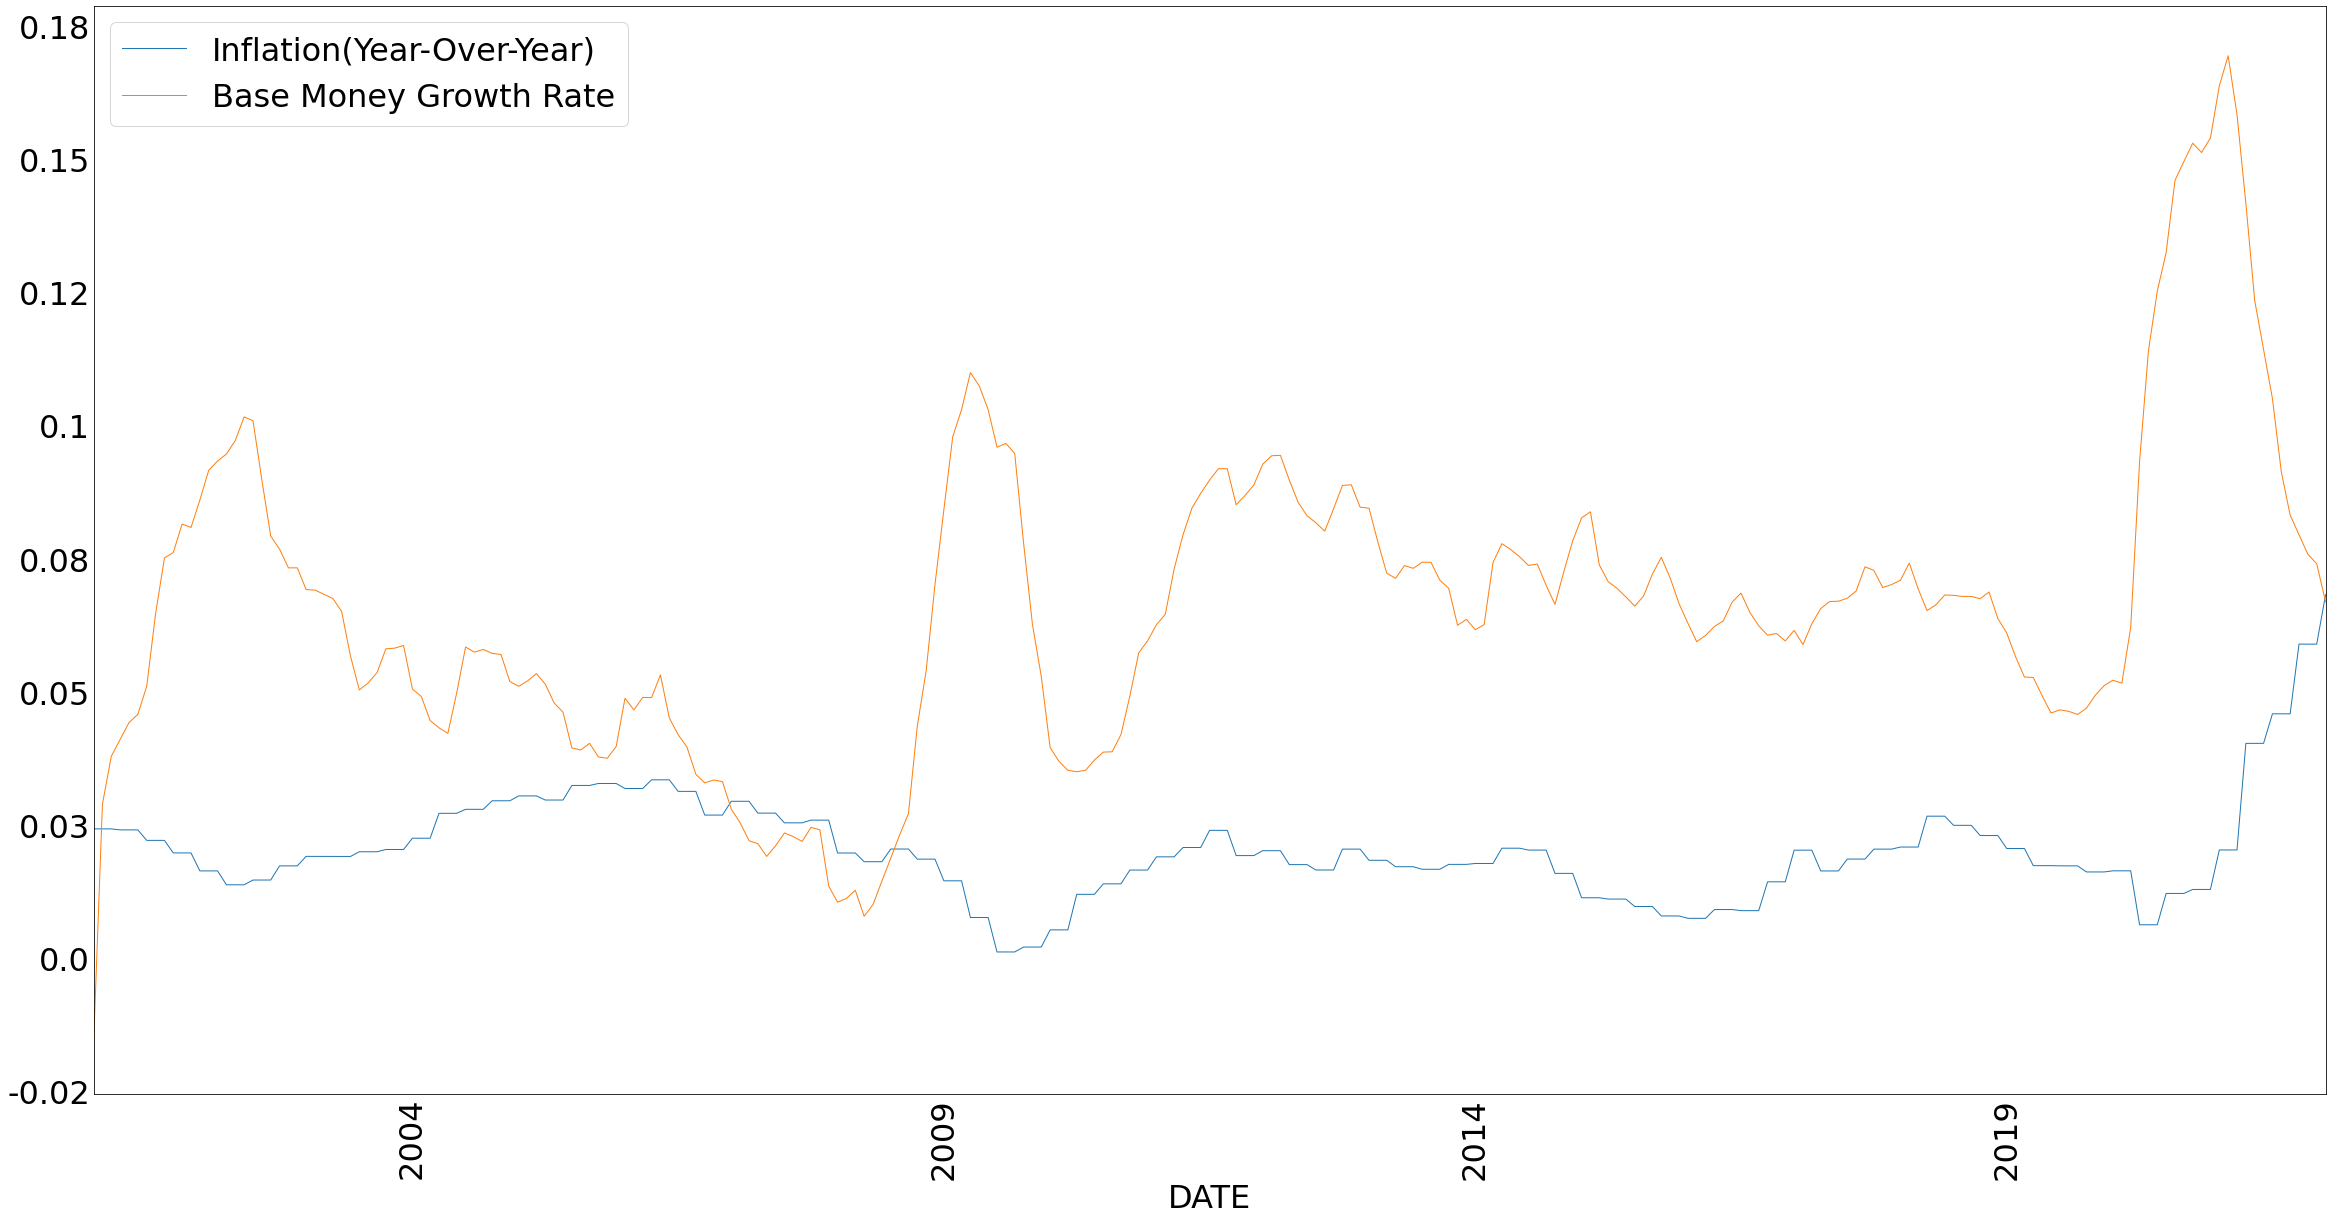

In [71]:
data["Base Money Growth Rate"] = data["Base Money"].pct_change(12)
pltvars = ["Inflation(Year-Over-Year)", "Base Money Growth Rate"]
plot_lines(data[pltvars])

Certainly, there is a positive correlation here. 

Next, I plot the equation of exhange to show that it holds up when tested with real-world data. 

In [6]:
data["Price Level"] = data["Price Level"]*100

In [19]:
exchange_vars = ["Price Level", "Real GDP", "Base Money", "Velocity of Money" ]

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


Text(0.5, 1.0, 'Equation of Exchange')

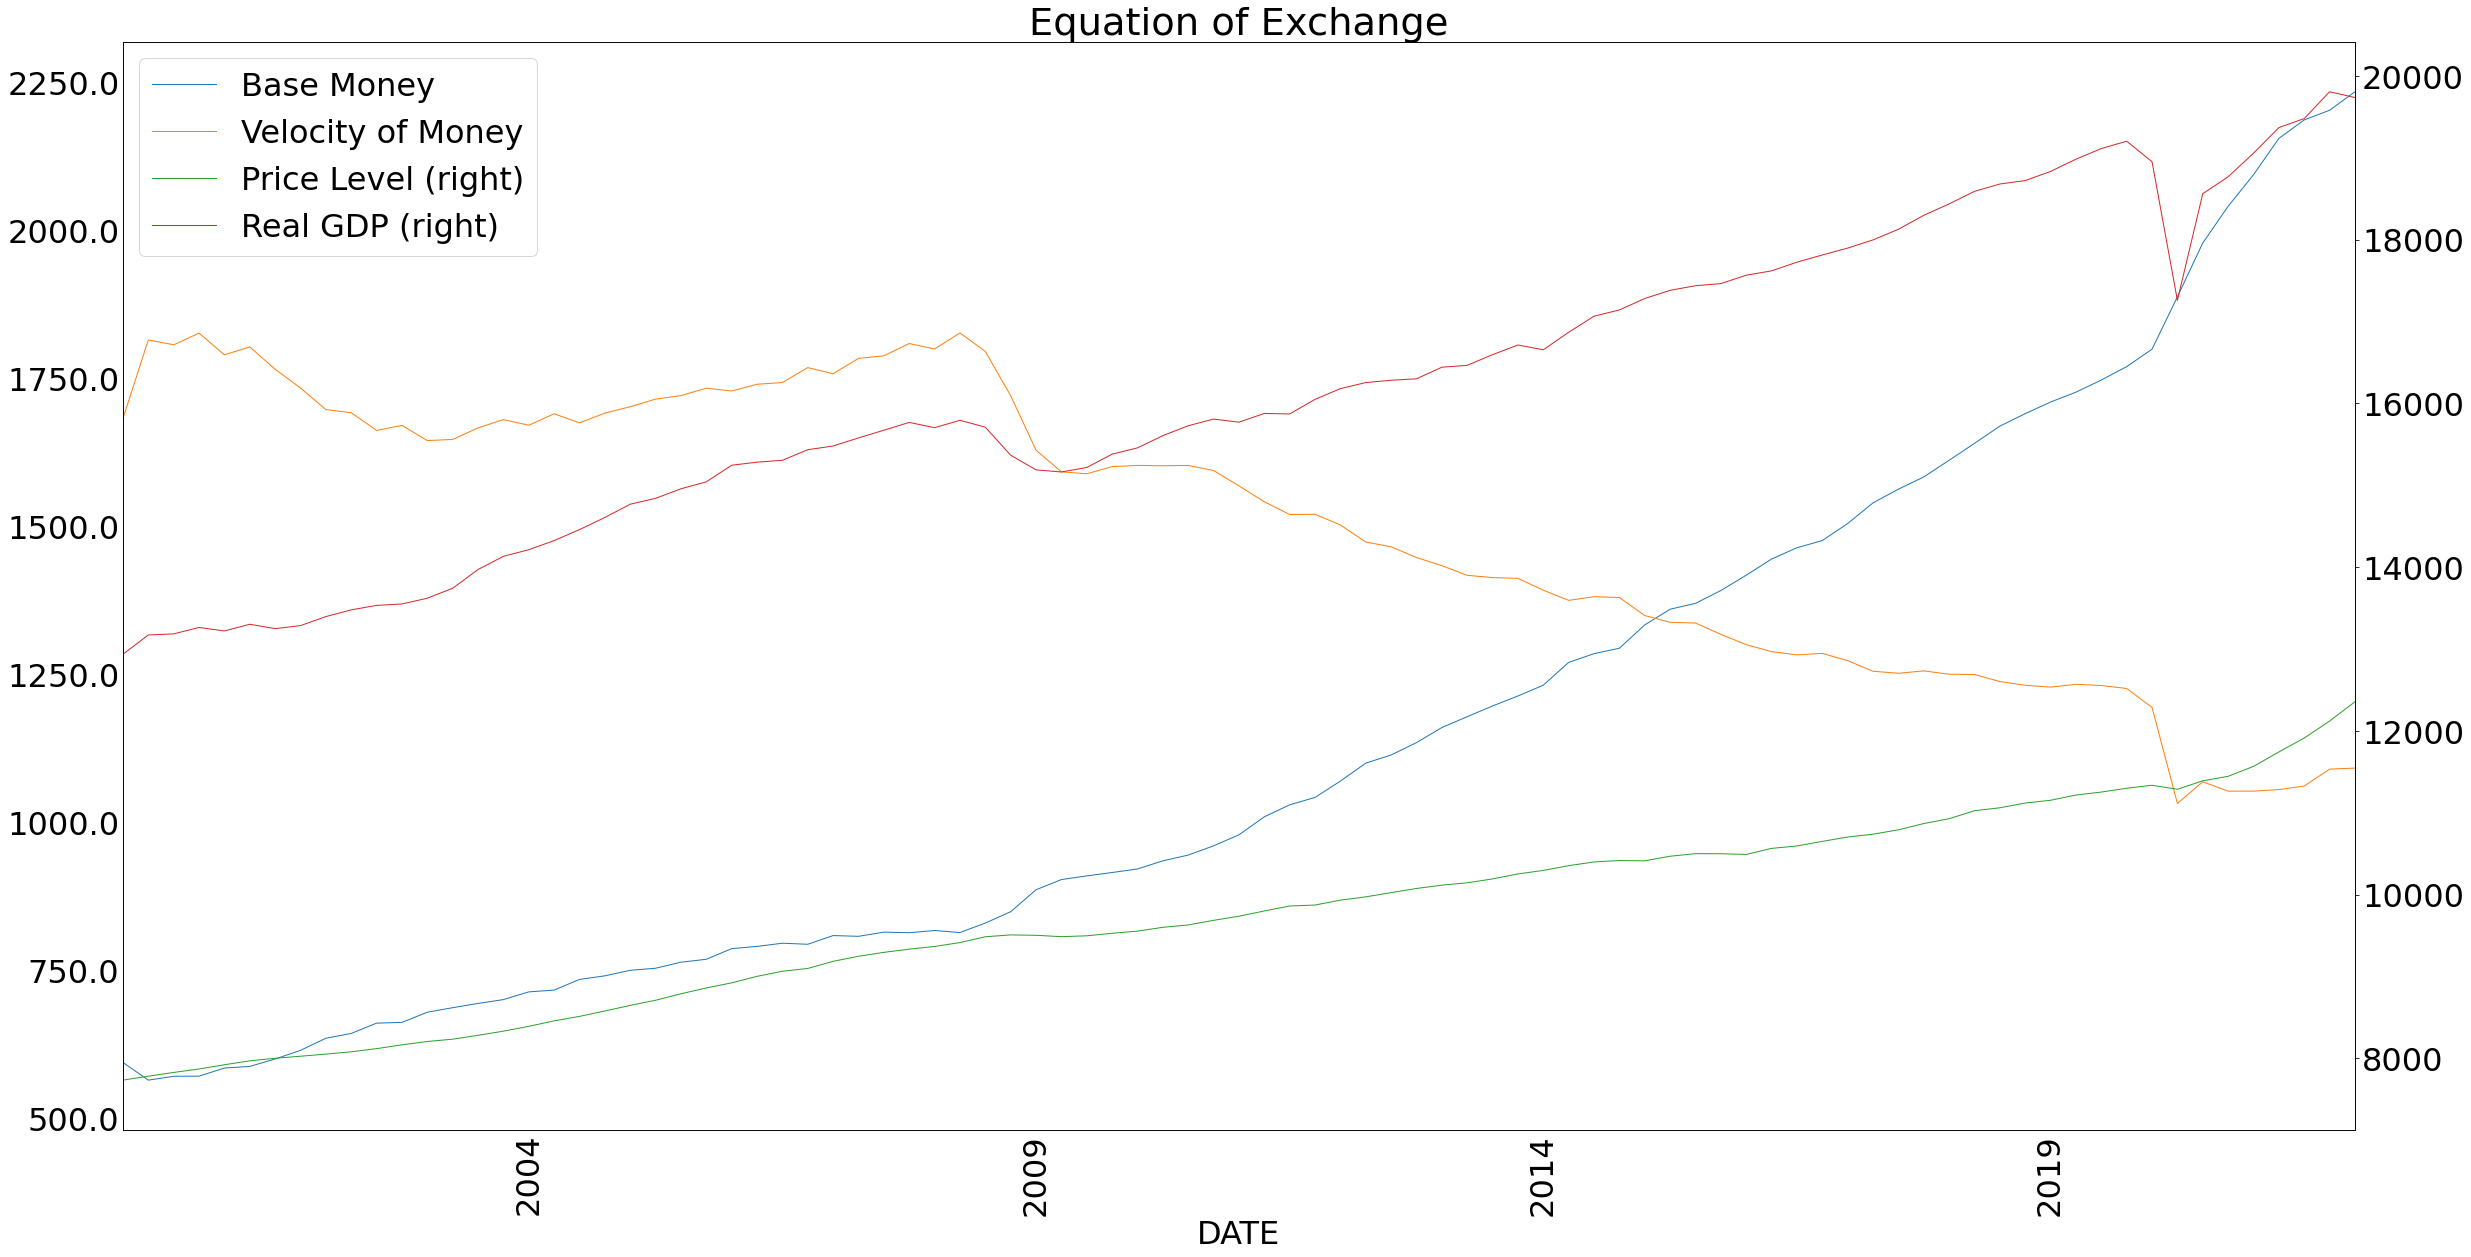

In [9]:
plot_lines(data[exchange_vars], secondary_y =["Real GDP", "Price Level"])
plt.title("Equation of Exchange")

In [81]:
vars4 = []
for var in exchange_vars: 
    data[var + " Pct Change"] = data[var].pct_change(12)
    vars4.append(var + " Pct Change")

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


Text(0.5, 1.0, 'Dynamic Equation of Exchange')

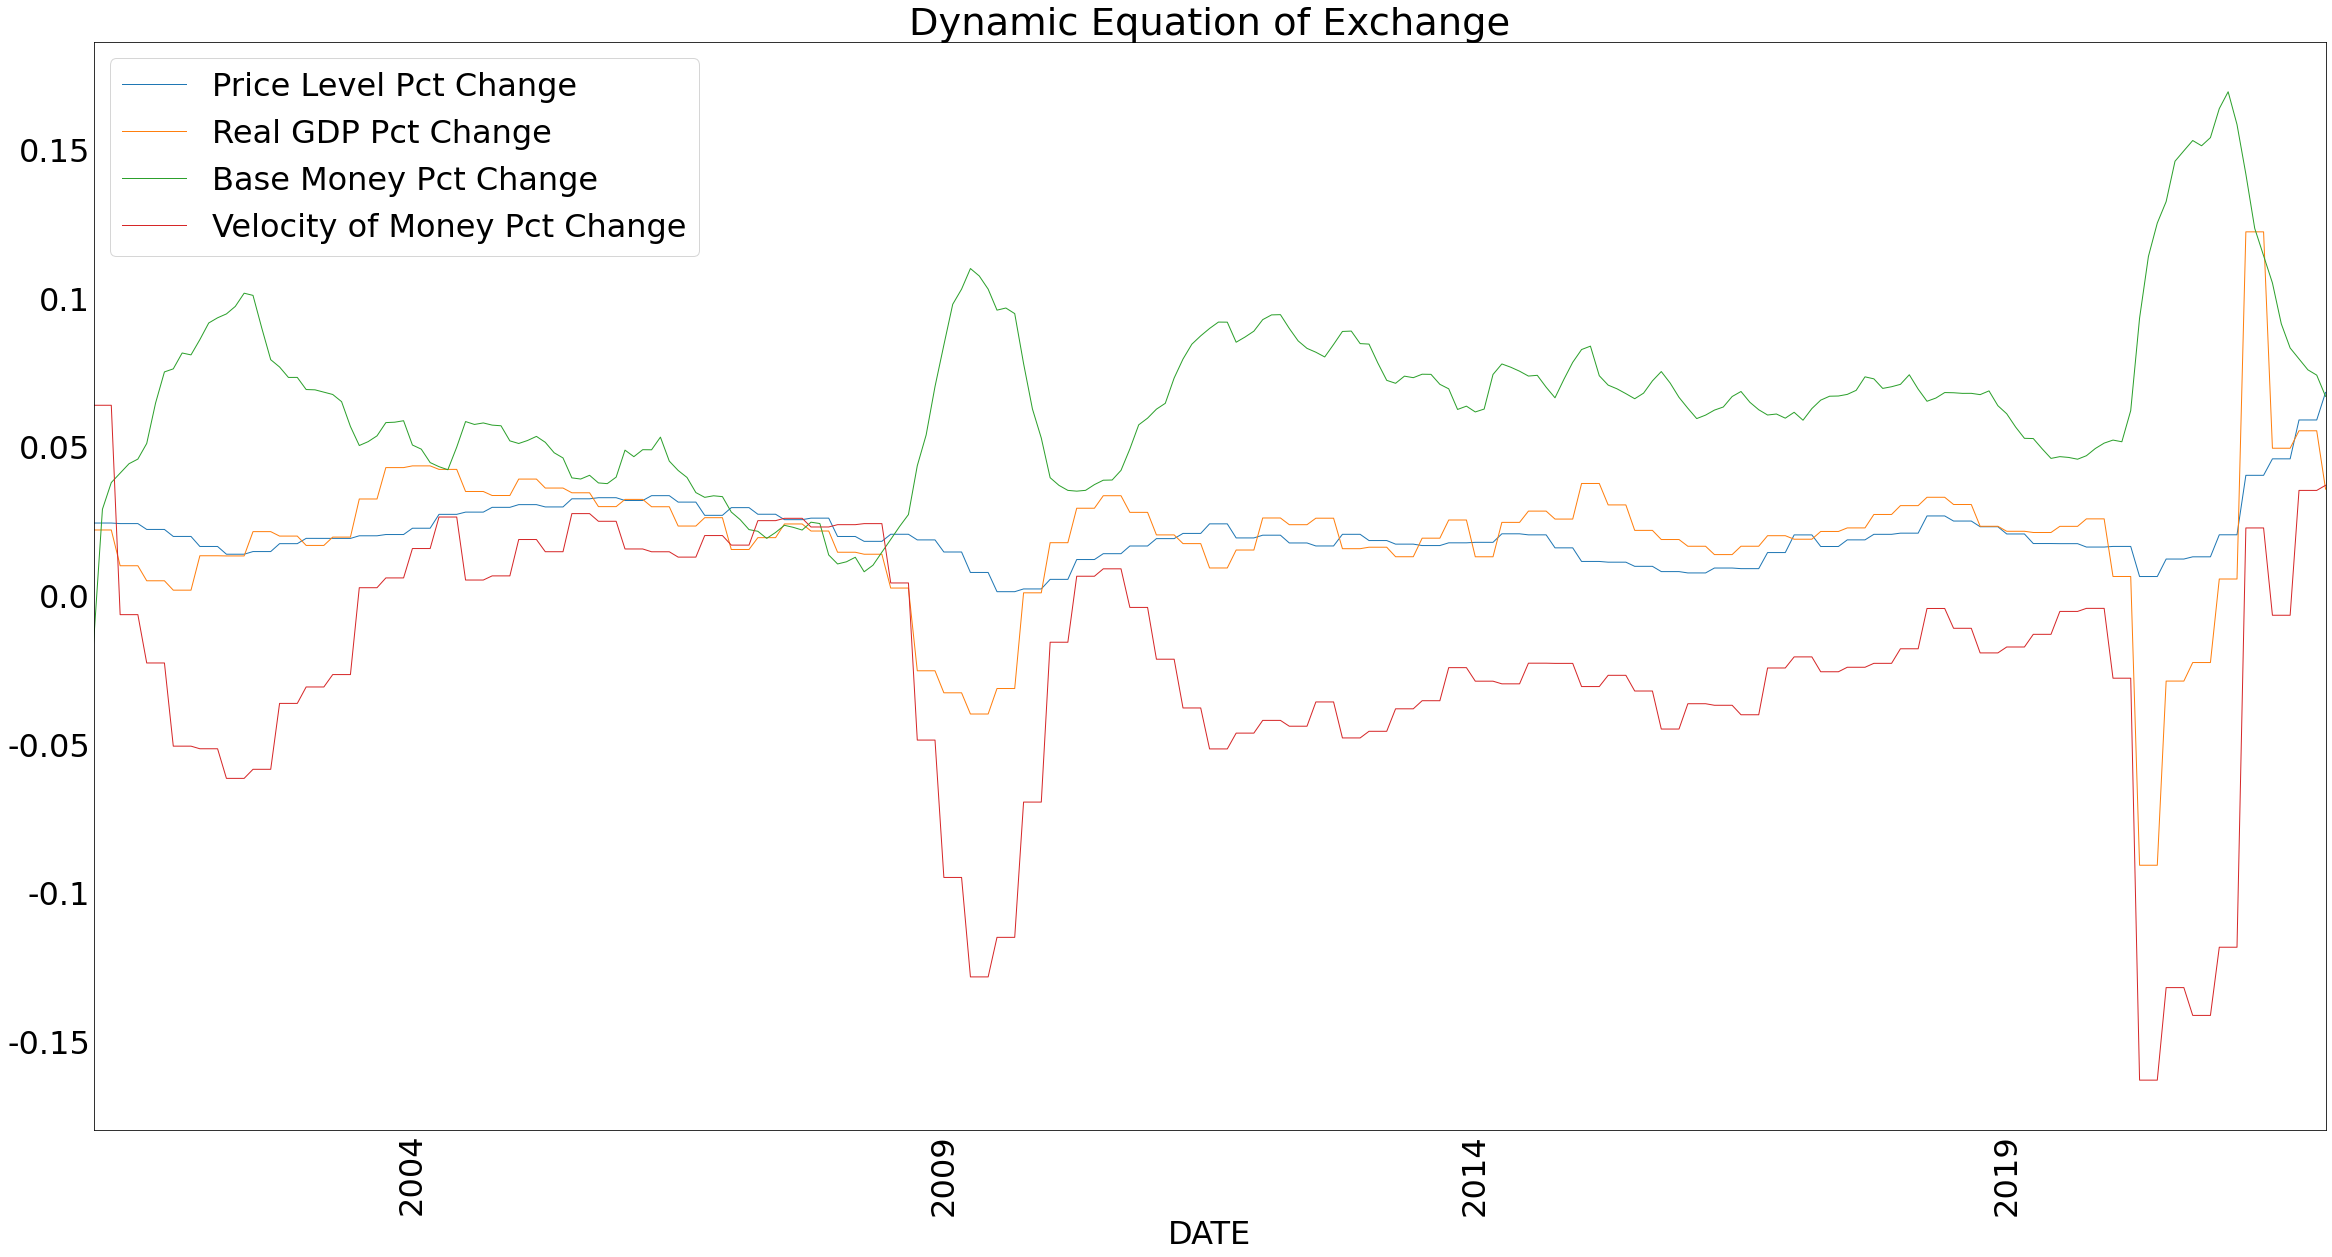

In [83]:
plot_lines(data[vars4])
plt.title("Dynamic Equation of Exchange")

As we can see, the relationships implied by the equation of exchange roughly hold. The Level of base money,  𝑀 , causes rises in the price level,  𝑃 , so they move together on our graph. Velocity of money has been falling recenly, but it is outpaced by increases in the monetary base, so even factoring in changes in the price level, real GDP has risen.

## Conclusion
Inflation has been a hot-button issue recently. We can use the equation of exchange  𝑀𝑉=𝑃𝑦  to understand why some of it is occuring. The United State's fiscal policy has consisted of expansionary measures designed to jog the economy during the COVID-19 pandemic. The equation of exchange suggest that increases in the monetary base will lead to inflation. The Federal Reserve has increased the Monetary Base through lowering the Federal Funds rate and the US congress has increased it through large increases in government spending. These policies are the main drivers of inflation, which has drastically decreased the purchasing power of US consumers. As Milton Friedman famously said, “Inflation is always and everywhere a monetary phenomenon in the sense that it is and can be produced only by a more rapid increase in the quantity of money than in output"[4].

## Sources
[1] “What Is Causing Inflation? Economists Point Fingers at Different Culprits.” NBCNews.com, NBCUniversal News Group, 16 Feb. 2022, https://www.nbcnews.com/business/business-news/whats-causing-inflation-economists-point-fingers-different-culprits-rcna16156. 

[2] Milton Friedman 1987. “quantity theory of money”, in The New Palgrave: A Dictionary of Economics  

[3] Board of Governors of the Federal Reserve System. "Monetary Policy: What Are Its Goals? How Does It Work?" https://www.federalreserve.gov/monetarypolicy/monetary-policy-what-are-its-goals-how-does-it-work.htm

[4] Friedman, Milton. Inflation: Causes and Consequences, p. 24, New York: Asia Publishing House.

[5] “Policy Responses to covid19.” IMF, https://www.imf.org/en/Topics/imf-and-covid19/Policy-Responses-to-COVID-19#U. 